In [34]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

In [35]:
# Download MNIST train dataset 
train_dataset = dsets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)

# Download MNIST test dataset
dataset = dsets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download=True)

We use train_test_split from sklearn that splits the dataset into test and validation datasets.
 
The train dataset contains 60000 data points. Similarly validation and test datasets contain 5500 and 4500 data points.

In [36]:
# Split the dataset into validation and test sets
val_dataset, test_dataset = train_test_split(dataset, train_size = .55, shuffle=True)

print("length of train, validation and test datasets:", len(train_dataset), len(val_dataset),len(test_dataset))

length of train, validation and test datasets: 60000 5500 4500


MNIST train dataset has 60000 samples where each sample is a tuple with two elements. First element represents the image of size [1,28,28] and second element gives the actual label(number between 0 to 9) representing the image. 

In [37]:
# Evaluating the test data
print("Value of first element of train dataset:", type(test_dataset[0]),len(train_dataset[0]))
print("Value of second element of train dataset:",type(test_dataset[1]),len(train_dataset[1]))

Value of first element of train dataset: <class 'tuple'> 2
Value of second element of train dataset: <class 'tuple'> 2


In [38]:
print("First element:", train_dataset[0])

First element: (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [39]:
print("Image representation of the first element:", type(test_dataset[0][0]),train_dataset[0][0].size())
print("Label of the first element:", type(test_dataset[0][1]), train_dataset[0][1])

Image representation of the first element: <class 'torch.Tensor'> torch.Size([1, 28, 28])
Label of the first element: <class 'int'> 5


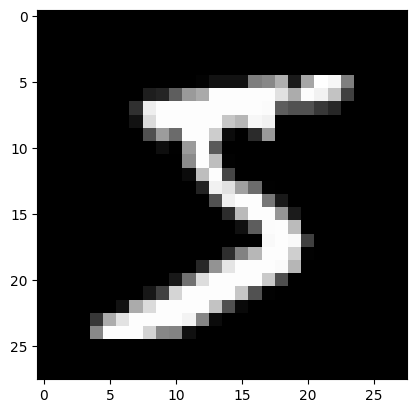

In [40]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [41]:
print("Image representation of the second element:", type(test_dataset[1][0]),train_dataset[1][0].size())
print("Label of the second element:", type(test_dataset[1][1]), train_dataset[1][1])

Image representation of the second element: <class 'torch.Tensor'> torch.Size([1, 28, 28])
Label of the second element: <class 'int'> 0


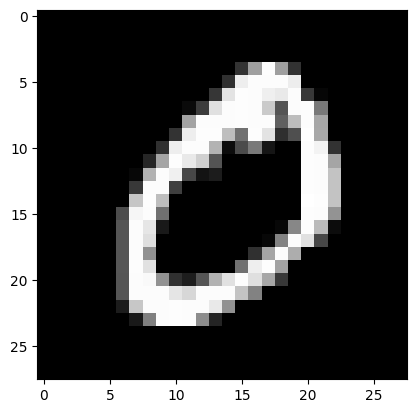

In [42]:
show_img = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

MNIST datasets are added to dataloaders to create batches of 100 samples to be used at a time. As train dataset is of 60000 samples, dataloader creates batches of 100 samples. In each iteration/epoch that runs over the whole dataset of 60000 samples once, this means that after every 100 samples batch model's weight is updated. This is carried out 600 times. So in each epoch model's weight is updated 600 times (60000/100). 

If you consider the batch size of 60000 samples, then the model's weight is updated only once in each epoch, which is not a good practice as model is getting less trained.

In [43]:
# Adding dataset to dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=100)
print("Length of train, validation and test loaders:",len(train_loader),len(val_loader),len(test_loader))

Length of train, validation and test loaders: 600 55 45


Since an image is of the size 28X28, hence we consider input dimension of each image to be 28X28.

The output of each image is a vector with the predicted probability of each number from 0 to 9. The predicted label would be the number with the highest probability. Hence the output dimension is considered as 10. 

In [44]:
# Initializations
epochs = 100
input_dim = 28*28
output_dim = 10
learning_rate = 0.001

For linear regression, we use the linear function a^T x+b. But for logistic regression, which basically is a classification technique requires sigmoid function 1/1+e^-(a^T x+b) to convert the output to the value between 0 and 1. 

We define a custom model class LogisticRegression by extending the torch.nn.Module class. _init_ method initialize the weights and bias using torch.nn.Linear() method. Forward method computes the predicted value using the given functions.



In [45]:
class LogisticRegression(torch.nn.Module):
 
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) 
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

Mean squared error (MSE) loss used for linear regression is not useful in case of classification as it makes the whole function non-convex. It is difficult to find global minimum in case of non-convex functions. Hence in logistic regression, we use cross entropy loss.

In pytorch, for binary classification we use Binary cross entropy loss (BCELoss). In case of multi-class classification as required in this example, CrossEntropyLoss() is used. 

Here we use Stochastic gradient descent (SGD) which updates the model parameters after computing their gradients

In [46]:
model = LogisticRegression(input_dim,output_dim)
criterion = torch.nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

The image part of an element of the train loader is of size [100,1,28,28]. We need to reshape the image part to [100,28 X 28], which means that second dimension is 784 (28 X 28).

In [51]:
iter=0
for images,labels in train_loader:
    iter+=1
    print(iter)
    print("image size",images.size())
    images = images.reshape(-1,28*28).requires_grad_()
    print("image size after reshape", images.size())
    if iter == 3:
        break

1
image size torch.Size([100, 1, 28, 28])
image size after reshape torch.Size([100, 784])
2
image size torch.Size([100, 1, 28, 28])
image size after reshape torch.Size([100, 784])
3
image size torch.Size([100, 1, 28, 28])
image size after reshape torch.Size([100, 784])


In [48]:
#Each epoch runs over the complete dataset once.
for epoch in range(epochs):
    total = 0
    correct = 0
    losses = 0
    iter = 0

    #Batch of 100 samples
    for images,labels in train_loader:
        #Reshaping the image
        images = images.reshape(-1,28*28).requires_grad_()
        #Predict the output using model function
        outputs = model(images)
        #Clear the gradients of the parameters
        optimizer.zero_grad()
        #Compute loss
        loss = criterion(outputs, labels) 
        #Back propagate the loss and calculate the gradients of the parameters
        loss.backward() 
        #Update parameters using SGD
        optimizer.step() 
        iter+=1
    
        # Calculating the loss and accuracy on the train dataset
        with torch.no_grad():
            predictions = model(images)
            #Considers the value with the highest probability for a sample
            _,value = torch.max(predictions, dim=1)
            total += labels.size()[0]
            losses += loss.item()
            correct += torch.sum(value == labels).item()
    accuracy = 100 * correct/total
    final_loss = losses/iter
    print(f"[{epoch}, {iter:5d}] Train -  Loss: {final_loss}. Accuracy: {accuracy}\n")
        
    val_total=0
    val_correct=0
    val_losses=0
    iter_val=0
    # Calculating the loss and accuracy on the validation dataset
    with torch.no_grad():
        for images_val,labels_val in val_loader:
            images_val = images_val.view(-1, 28*28).requires_grad_()
            outputs_val = model(images_val)
            _,value_val = torch.max(outputs_val, dim=1)
            
            val_total += labels_val.size()[0]
            val_loss = criterion(outputs_val,labels_val)
            val_losses += val_loss.item()
            val_correct += torch.sum(value_val == labels_val).item()
            iter_val+=1
    accuracy_val = 100 * val_correct/val_total
    final_loss_val = val_losses/iter_val
    print(f"[{epoch}, {iter_val:5d}] Val -  Loss: {final_loss_val}. Accuracy: {accuracy_val}\n")


[0,   600] Train -  Loss: 2.279031910498937. Accuracy: 22.606666666666666

[0,    55] Val -  Loss: 2.258206575567072. Accuracy: 36.36363636363637

[1,   600] Train -  Loss: 2.2414424149195353. Accuracy: 45.795

[1,    55] Val -  Loss: 2.2213939493352717. Accuracy: 55.25454545454546

[2,   600] Train -  Loss: 2.207268260717392. Accuracy: 60.095

[2,    55] Val -  Loss: 2.1882158279418946. Accuracy: 66.41818181818182

[3,   600] Train -  Loss: 2.176449817816416. Accuracy: 67.27833333333334

[3,    55] Val -  Loss: 2.158306355909868. Accuracy: 70.85454545454546

[4,   600] Train -  Loss: 2.1485597475369773. Accuracy: 70.94833333333334

[4,    55] Val -  Loss: 2.131200582330877. Accuracy: 73.6

[5,   600] Train -  Loss: 2.123187743028005. Accuracy: 73.23833333333333

[5,    55] Val -  Loss: 2.106513773311268. Accuracy: 75.49090909090908

[6,   600] Train -  Loss: 2.100010761419932. Accuracy: 74.86

[6,    55] Val -  Loss: 2.083951356194236. Accuracy: 76.76363636363637

[7,   600] Train -  

In [49]:
#Save the model using state_dict() to file named "mnist_logistic.pth"
torch.save(model.state_dict(), 'mnist_logistic.pth')
print("Saved model:", model.state_dict())

#Create a new instance of the class LogisticRegression and load the previous model from the saved file.
model_log = LogisticRegression(input_dim,output_dim)
model_log.load_state_dict(torch.load('mnist_logistic.pth'))
print("Load model:",model_log.state_dict())

Saved model: OrderedDict([('linear.weight', tensor([[-0.0346, -0.0344,  0.0179,  ...,  0.0180,  0.0036,  0.0258],
        [-0.0192,  0.0087, -0.0104,  ...,  0.0163, -0.0071,  0.0257],
        [-0.0322, -0.0163, -0.0317,  ..., -0.0256, -0.0111,  0.0013],
        ...,
        [-0.0296, -0.0158, -0.0126,  ...,  0.0185, -0.0125, -0.0325],
        [ 0.0236,  0.0052, -0.0255,  ...,  0.0183,  0.0286, -0.0042],
        [-0.0260, -0.0083,  0.0356,  ...,  0.0031, -0.0347, -0.0343]])), ('linear.bias', tensor([-0.1227,  0.0670, -0.0910, -0.1465, -0.0341,  0.0204, -0.0955, -0.0333,
        -0.2525, -0.0843]))])
Load model: OrderedDict([('linear.weight', tensor([[-0.0346, -0.0344,  0.0179,  ...,  0.0180,  0.0036,  0.0258],
        [-0.0192,  0.0087, -0.0104,  ...,  0.0163, -0.0071,  0.0257],
        [-0.0322, -0.0163, -0.0317,  ..., -0.0256, -0.0111,  0.0013],
        ...,
        [-0.0296, -0.0158, -0.0126,  ...,  0.0185, -0.0125, -0.0325],
        [ 0.0236,  0.0052, -0.0255,  ...,  0.0183,  0.0286

In [50]:
#Calculate loss and accuracy of the test dataset using saved model
test_total=0
test_correct=0
test_losses=0
iter_test=0
with torch.no_grad():
    for images_test,labels_test in test_loader:
        images_test = images_test.view(-1, 28*28).requires_grad_()
        outputs_test = model(images_test)
        _,value_test = torch.max(outputs_test, dim=1)
        
        test_total += labels_test.size()[0]
        test_loss = criterion(outputs_test,labels_test)
        test_losses += test_loss.item()
        test_correct += torch.sum(value_test == labels_test).item()
        # print("iter",epoch,iter_test)
        iter_test+=1
accuracy_test = 100 * test_correct/test_total
final_loss_test = test_losses/iter_test
print(f"[{epoch}, {iter_test:5d}] Test -  Loss: {final_loss_test}. Accuracy: {accuracy_test}\n")


[99,    45] Test -  Loss: 1.7206759452819824. Accuracy: 85.73333333333333

